In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path1 = '/content/drive/My Drive/xyz/image-36.jpg'
path2 = '/content/drive/My Drive/xyz/images.jpg'

In [ ]:
plt.rcParams["figure.figsize"] = (16,12)

In [ ]:
#plot and compare results
def plot(data, title, pdf, cdf):
    plot.i += 1
    plt.subplot(2, 2, plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
    plot.i += 1
    ax1 = plt.subplot(2, 2, plot.i)
    ax1.bar(list(pdf.keys()), list(pdf.values()))
    ax1.set_ylabel('pdf')
    plt.legend(['pdf'], loc='upper left')
    ax2 = ax1.twinx()
    ax2.plot(list(cdf.keys()), list(cdf.values()))
    ax2.set_ylabel('cdf')
    plt.legend(['cdf'], loc='upper right')


In [ ]:
#calculate pdf and cdf of passed distribution
def distribution(data):
    r = data.shape[0]
    c = data.shape[1]
    pdf = dict()
    cdf = dict()
    for i in range(256):
        pdf[i] = 0
        cdf[i] = 0
    for i in range(r):
        for j in range(c):
            pdf[data[i][j]] += 1
    cdf[0] = pdf[0]
    for i in range(1, 256):
        cdf[i] = pdf[i]+cdf[i-1]
    return pdf, cdf

In [ ]:
#perform histogram equilization
def equalize(data):
    r = data.shape[0]
    c = data.shape[1]
    N = r*c
    pdf, cdf = distribution(data)
    plot(data, 'original image', pdf, cdf)
    for i in range(r):
        for j in range(c):
            data[i][j] = int(cdf[data[i][j]]/N*255+0.00000000001)
    pdf, cdf = distribution(data)

    plot(data, 'histogram equalized image', pdf, cdf)
    plt.show()


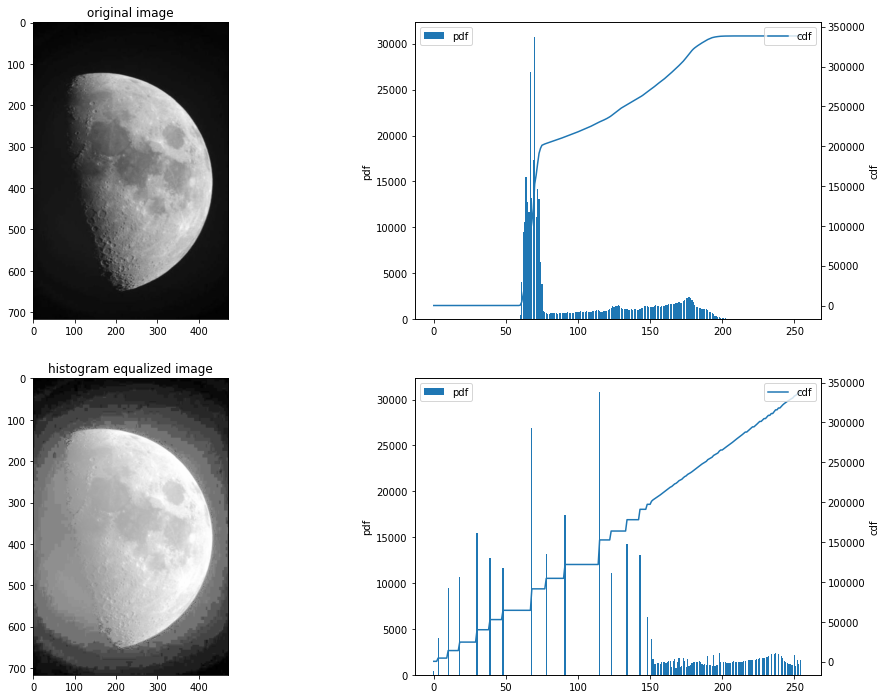

In [ ]:
plot.i = 0
im = Image.open(path1)
im = ImageOps.grayscale(im)
data = np.array(im, dtype=int)
equalize(data)

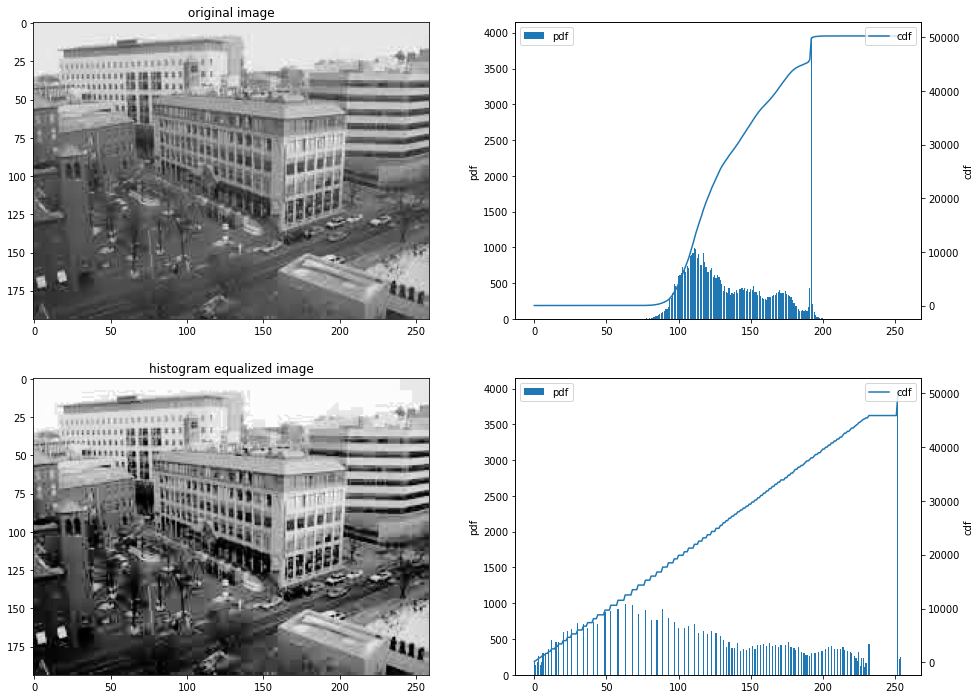

In [ ]:

plot.i = 0
im = Image.open(path2)
im = ImageOps.grayscale(im)
data = np.array(im, dtype=int)
equalize(data)
